<a href="https://colab.research.google.com/github/CodeScribbl/AIML/blob/main/notebook/PDF_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2024 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Read a PDF

This notebook demonstrates how you can convert a PDF file so that it can be read by the Gemini API.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/PDF_Files.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Setup

In [1]:
!pip install -Uq google-generativeai

In [2]:
import google.generativeai as genai


import pathlib
import tqdm
import os

## Configure your API key

To run the following cell, your API key must be stored in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) for an example.

In [3]:
from google.colab import userdata
genai.configure(api_key=userdata.get("GOOGLE_API_KEY"))

## Download and inspect the PDF

Install the PDF processing tools. You don't need these to use the API, it's just used to display a screenshot of a page.

In [4]:
!apt install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 1s (214 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...


This PDF page is an article titled [Smoothly editing material properties of objects with text-to-image models and synthetic data](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) available on the Google Research Blog.

In [ ]:
if not pathlib.Path('test.pdf').exists():
  !curl -o test.pdf https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf

Look at one of the pages:

In [11]:
!pdftoppm test.pdf -f 1 -l 30 page-image -jpeg
!ls

page-image-01.jpg  page-image-08.jpg  page-image-15.jpg  page-image-22.jpg  page-image-29.jpg
page-image-02.jpg  page-image-09.jpg  page-image-16.jpg  page-image-23.jpg  page-image-30.jpg
page-image-03.jpg  page-image-10.jpg  page-image-17.jpg  page-image-24.jpg  sample_data
page-image-04.jpg  page-image-11.jpg  page-image-18.jpg  page-image-25.jpg  test.pdf
page-image-05.jpg  page-image-12.jpg  page-image-19.jpg  page-image-26.jpg
page-image-06.jpg  page-image-13.jpg  page-image-20.jpg  page-image-27.jpg
page-image-07.jpg  page-image-14.jpg  page-image-21.jpg  page-image-28.jpg


In [6]:
import PIL.Image

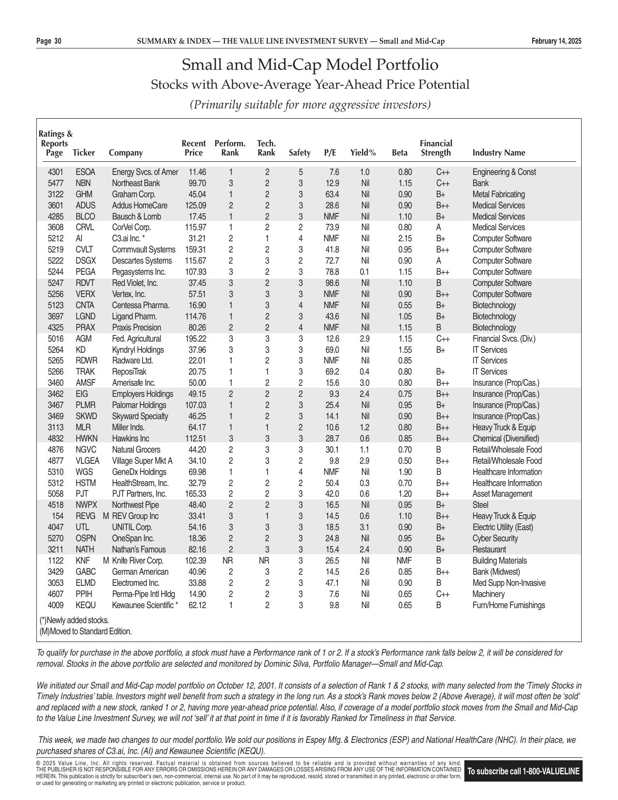

In [13]:
img = PIL.Image.open(f"page-image-30.jpg")
img.thumbnail([800, 800])
img

## Upload the file to the API

In [14]:
file_ref = genai.upload_file('test.pdf')

## Try it out

In [15]:
model = genai.GenerativeModel(model_name='gemini-1.5-flash')

The pages of the PDF file are each passed to the model as a screenshot of the page plus the text extracted by OCR.

In [16]:
model.count_tokens([file_ref, '\n\nCan you summarize this file as a bulleted list?'])

total_tokens: 193194

In [17]:
response = model.generate_content(
    [file_ref, '\n\nCan you summarize this file as a bulleted list?']
)

In [18]:
from IPython.display import Markdown
Markdown(response.text)

Here's a bulleted summary of the provided Value Line Investment Survey document:

* **Part 1: Summary & Index (February 14, 2025):** This section provides an overview of the survey's contents, including:
    * Key market statistics: Median trailing P/E ratio, median estimated yield (next 12 months) for dividend-paying stocks, and average yield for all stocks.
    * Model portfolio information: References to pages detailing the Small and Mid-Cap Model Portfolio and the Small and Mid-Cap Model Dividend Portfolio.
    * Alphabetical industry list with issue numbers for quick reference.
    * Various stock screens (e.g., smallest market-cap stocks, highest-ranked stocks, conservative stocks, high-yielding stocks, etc.).  These screens filter the universe of stocks based on various financial metrics.


* **Part 2: Ratings & Reports (not included in the provided scan):** This section contains detailed information on individual companies and industries.  References to it are included in Part 1.

* **Index to Stocks:** A comprehensive list of small- and mid-cap stocks included in the survey, organized alphabetically, with various ranking scores, financial metrics (price, P/E ratio, yield, etc.), and performance data.

* **Small & Mid-Cap Model Portfolio:** This section discusses the model portfolio's performance against the Russell 2000 index and details changes made to the portfolio this week (selling NHC and ESP, buying AI and KEQU). It provides rationale for these changes, highlighting the underlying technology and growth prospects of C3.ai and Kewaunee Scientific.

* **Small & Mid-Cap Dividend Model Portfolio:**  This section discusses the performance of the dividend model portfolio against the Russell 2000 index, noting that it outperformed it, and explains why no changes were made to this portfolio.  It also discusses recent fourth-quarter earnings results and the ongoing scrutiny of technology stocks.

* **Additional Tables:**  The document includes tables listing:
    * The 25 smallest market-cap stocks in the current issue.
    * The highest-ranked stocks within the highest-ranked industries.
    * Stocks ranked 1 and 2 for relative safety.
    * High-yielding stocks.
    * Biggest "free-flow" cash generators.
    * Stocks with the widest discounts from book value.
    * Stocks ranked 1, 2, and 5 for performance (based on different ranking criteria).


The document is primarily a reference tool providing quick access to data and analysis on small- and mid-cap companies, as well as model portfolio suggestions and explanations of the rationale behind the portfolio decisions.


In addition, take a look at how the Gemini model responds when you ask questions about the images within the PDF.

In [19]:
response_2 = model.generate_content(
    [file_ref, '\n\nCan you extract the table on the page 30 of the document as CSV list?']
)

In [20]:
from IPython.display import Markdown
Markdown(response_2.text)

Here's a CSV representation of the table from page 30.  Please note that some data is presented as symbols or ranges, making exact numerical representation difficult.  I've used placeholders where needed.  You can replace these placeholders with more accurate values if you have access to the full Value Line report.

```csv
Ratings & Reports,Recent,Perform.,Tech.,Safety,P/E,Yield%,Beta,Financial,Industry Name
Page,Ticker,Company,Price,Rank,Rank,Rank,Ratio,%,Strength,
4301,ESOA,Energy Svcs. of Amer,11.46,1,2,5,7.6,1.0,C++,Engineering & Const
5477,NBN,Northeast Bank,99.70,3,2,3,12.9,Nil,C++,Bank
3122,GHM,Graham Corp.,45.04,1,2,3,63.4,Nil,B+,Metal Fabricating
3601,ADUS,Addus HomeCare,125.09,2,2,3,28.6,Nil,B++,Medical Services
4285,BLCO,Bausch & Lomb,17.45,1,2,3,NMF,Nil,B+,Medical Services
3608,CRVL,CorVel Corp.,115.97,1,2,2,73.9,Nil,A,Medical Services
5212,AI,C3.ai Inc. *,31.21,2,1,4,NMF,Nil,B+,Computer Software
5219,CVLT,Commvault Systems,159.31,2,2,3,41.8,Nil,B++,Computer Software
5222,DSGX,Descartes Systems,115.67,2,3,2,72.7,Nil,A,Computer Software
5244,PEGA,Pegasystems Inc.,107.93,3,2,3,78.5,0.1,B++,Computer Software
5247,RDVT,Red Violet, Inc.,37.45,3,2,4,NMF,Nil,B,Computer Software
5256,VERX,Vertex, Inc.,57.51,3,3,3,NMF,Nil,B++,Computer Software
5123,CNTA,Centessa Pharma.,16.90,1,3,4,NMF,Nil,B+,Biotechnology
3697,LGND,Ligand Pharm.,114.76,1,2,3,43.6,Nil,B+,Biotechnology
4325,PRAX,Praxis Precision,80.26,2,2,4,NMF,Nil,B,Biotechnology
5016,AGM,Fed. Agricultural,195.22,3,3,3,12.6,2.9,C++,Financial Svcs. (Div.)
5264,KD,Kyndryl Holdings,37.96,3,3,3,69.0,Nil,B+,IT Services
5265,RDWR,Radware Ltd.,22.01,1,2,3,NMF,Nil,B+,IT Services
5266,TRAK,ReposiTrak,20.75,1,1,3,69.2,0.4,B+,IT Services
3460,AMSF,Amerisafe Inc.,50.00,1,2,2,15.6,3.0,B++,Insurance (Prop/Cas.)
3462,EIG,Employers Holdings,49.15,2,2,2,9.3,2.4,B++,Insurance (Prop/Cas.)
3467,PLMR,Palomar Holdings,107.03,1,2,3,25.4,Nil,B+,Insurance (Prop/Cas.)
3469,SKWD,Skyward Specialty,46.25,1,2,3,10.7,Nil,B++,Insurance (Prop/Cas.)
3113,MLR,Miller Inds.,64.17,1,1,2,10.6,1.2,B++,Heavy Truck & Equip
4832,HWKN,Hawkins Inc,112.51,3,3,3,28.7,0.6,B++,Chemical (Diversified)
4876,NGVC,Natural Grocers,44.20,2,3,3,30.1,1.1,B,Retail/Wholesale Food
4877,VLGEA,Village Super Mkt A,34.10,2,3,2,9.8,2.9,B++,Retail/Wholesale Food
5310,WGS,GeneDx Holdings,69.98,1,1,4,NMF,Nil,B,Healthcare Information
5312,HSTM,HealthStream, Inc.,32.79,2,2,2,50.4,0.3,B++,Healthcare Information
5058,PJT,PJT Partners, Inc.,165.33,2,2,3,42.0,0.6,B++,Asset Management
4518,NWPX,Northwest Pipe,48.40,2,2,3,16.5,Nil,B+,Steel
154,REVG,REV Group Inc,33.41,3,1,3,14.5,0.6,B++,Heavy Truck & Equip
4047,UTL,UNITIL Corp.,54.16,3,3,3,18.5,3.1,B+,Electric Utility (East)
5270,OSPN,OneSpan Inc.,18.36,2,2,3,24.8,Nil,B+,Cyber Security
3211,NATH,Nathan's Famous,82.16,2,3,3,15.4,2.4,B+,Restaurant
1122,KNF,Knife River Corp.,102.39,NR,NR,3,26.5,Nil,NMF,B,Building Materials
3429,GABC,German American,40.96,2,3,2,14.5,2.6,B++,Bank (Midwest)
3053,ELMD,Electromed Inc.,33.88,2,2,3,45.5,Nil,B,Med Supp Non-Invasive
4607,PPIH,Perma-Pipe Intl Hidg,14.90,2,2,3,14.5,Nil,C++,Furn/Home Furnishings
*,Newly added stocks.
,(M) Moved to Standard Edition.


```

If you observe the area of the header of the article, you can see that the model captures what is happening.

## Learning more

The File API lets you upload a variety of multimodal MIME types, including images, audio, and video formats. The File API handles inputs that can be used to generate content with `model.generateContent` or `model.streamGenerateContent`.

The File API accepts files under 2GB in size and can store up to 20GB of files per project. Files last for 2 days and cannot be downloaded from the API.

* Learn more about the [File API](https://github.com/google-gemini/cookbook/blob/main/quickstarts/File_API.ipynb) with the quickstart.

* Learn more about prompting with [media files](https://ai.google.dev/gemini-api/docs/file-prompting-strategies) in the docs, including the supported formats and maximum length.
